In [ ]:
%pip install seaborn

In [3]:
import pandas as pd
from pycaret.classification import *
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 1. Cargar y explorar la data
df = pd.read_csv('caso2_microcredito_default.csv')

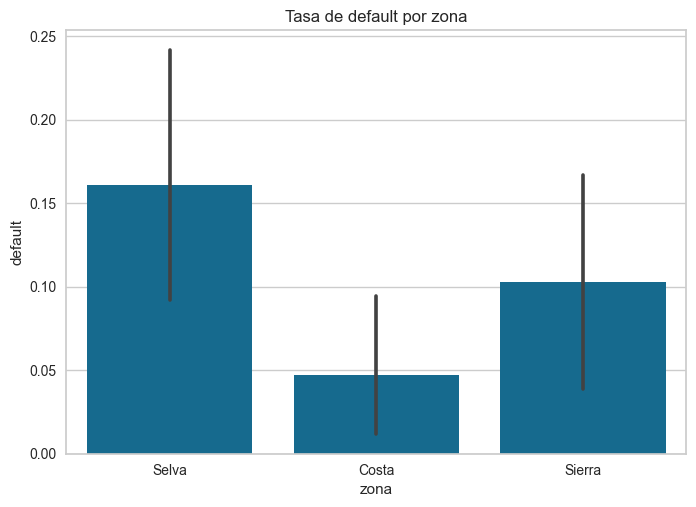

In [5]:
# 2. Análisis exploratorio NO trivial: identificar patrones por zona
sns.barplot(x='zona', y='default', data=df)
plt.title("Tasa de default por zona")
plt.show()

In [6]:
# 3. Segmentar por negocios donde el default es mayor
df_seg = df[df['tipo_negocio'].isin(['Agrícola', 'Comercio'])]

In [7]:
# 4. Configurar PyCaret con enfoque segmentado
exp = setup(data=df_seg,
            target='default',
            session_id=999,
            categorical_features=['zona', 'tipo_negocio'],
            ignore_features=['cuotas_pagadas'],
            remove_multicollinearity=True,
            multicollinearity_threshold=0.8,
            normalize=True)

,Description,Value
0,Session id,999
1,Target,default
2,Target type,Binary
3,Original data shape,"(144, 7)"
4,Transformed data shape,"(144, 8)"
5,Transformed train set shape,"(100, 8)"
6,Transformed test set shape,"(44, 8)"
7,Ignore features,1
8,Numeric features,3
9,Categorical features,2


In [8]:
# 5. Buscar el mejor modelo considerando AUC y Recall
best = compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8300,0.4556,0.1000,0.0500,0.0667,0.0063,0.0060,0.1240
lr,Logistic Regression,0.9100,0.5111,0.0000,0.0000,0.0000,nan,0.0000,0.3160
knn,K Neighbors Classifier,0.9000,0.4667,0.0000,0.0000,0.0000,nan,-0.0111,0.1230
nb,Naive Bayes,0.7900,0.5556,0.0000,0.0000,0.0000,-0.0687,-0.0833,0.0070
svm,SVM - Linear Kernel,0.8500,0.3000,0.0000,0.0000,0.0000,nan,-0.0500,0.0080
ridge,Ridge Classifier,0.9100,0.5333,0.0000,0.0000,0.0000,nan,0.0000,0.0070
rf,Random Forest Classifier,0.8900,0.5056,0.0000,0.0000,0.0000,nan,-0.0167,0.0210
qda,Quadratic Discriminant Analysis,0.8300,0.4556,0.0000,0.0000,0.0000,-0.0553,-0.0607,0.0070
ada,Ada Boost Classifier,0.8300,0.2722,0.0000,0.0000,0.0000,-0.0641,-0.0667,0.0170
gbc,Gradient Boosting Classifier,0.8400,0.4667,0.0000,0.0000,0.0000,-0.0598,-0.0611,0.0180


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,0.0000,0.0000,0.0000,nan,0.0000
1,0.9000,0.8889,1.0000,0.5000,0.6667,0.6154,0.6667
2,0.9000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.7000,0.3889,0.0000,0.0000,0.0000,-0.1538,-0.1667
5,0.9000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8000,0.8889,0.0000,0.0000,0.0000,-0.1111,-0.1111


Fitting 10 folds for each of 10 candidates, totalling 100 fits


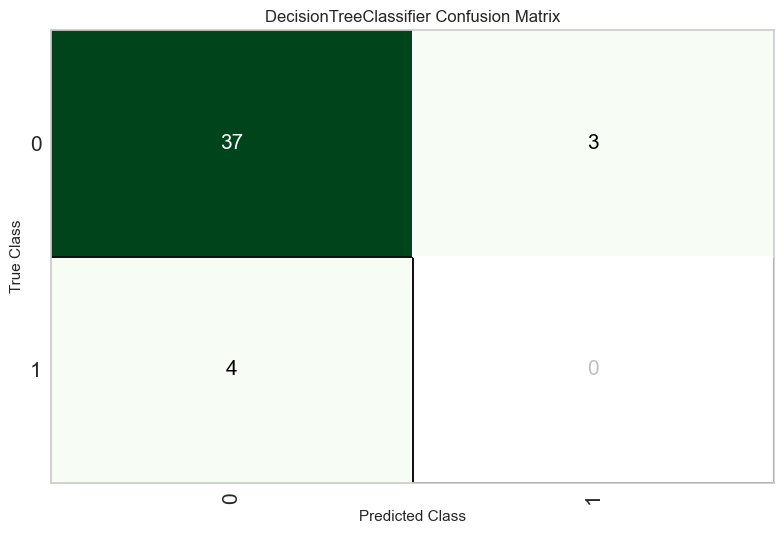

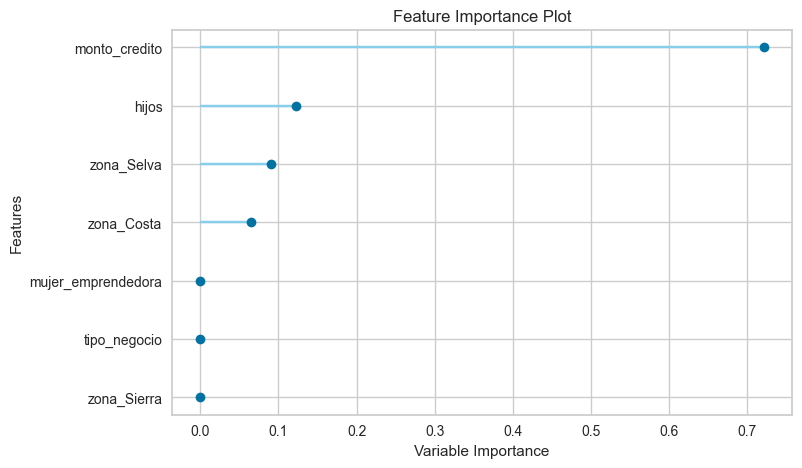

In [9]:
# 6. Evaluación de sensibilidad para reducir falsos negativos
final_model = tune_model(best, optimize='Recall')
plot_model(final_model, plot='confusion_matrix')
plot_model(final_model, plot='feature')

In [10]:
# 7. Interpretación por zona
interpret_model(final_model, plot='summary')

ModuleNotFoundError: 
'shap' is a soft dependency and not included in the pycaret installation. Please run: `pip install shap` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

In [11]:
# 8. Simular nuevo crédito (no usar todo el df)
nuevo_cliente = pd.DataFrame({
    'zona': ['Selva'],
    'tipo_negocio': ['Agrícola'],
    'monto_credito': [4500],
    'mujer_emprendedora': [1],
    'hijos': [3]
})
pred = predict_model(final_model, data=nuevo_cliente)
print(pred)

    zona tipo_negocio  monto_credito  mujer_emprendedora  hijos  \
0  Selva     Agrícola           4500                   1      3   

   prediction_label  prediction_score  
0                 0               1.0  


In [12]:
# 9. Guardar para pipeline rural
save_model(final_model, 'modelo_default_rural_selva')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['monto_credito',
                                              'mujer_emprendedora', 'hijos'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     includ...
                                     transformer=StandardScaler(copy=True,
                     